[  1   2  18   4   5   6   7   8  10  10  11  12  13  29   6  16  35  18
  19  41  21  22  23  24  25  34  27  28  29  30  31  32  33  96  35  36
  37  56  39  40  41  42  43  44  45  46  47  48  49  31  51  52  53  54
  55  56  57  58  78  60  61  62  63  77  65  66  67  47  69  71  71  72
  73  74  75  76  97  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  73  93  94  95  96  97  98  99  81 101 102  95 104 105 106  22 113
 109 110 111  90 113 114 115 104 117 118 100 120]
120
S= [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0

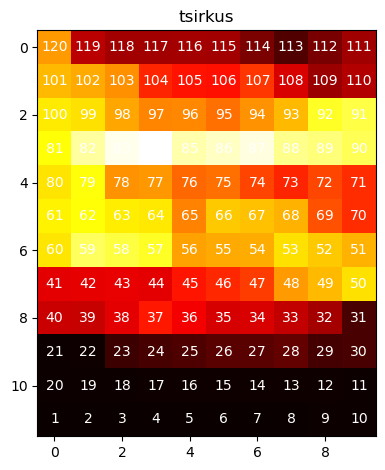

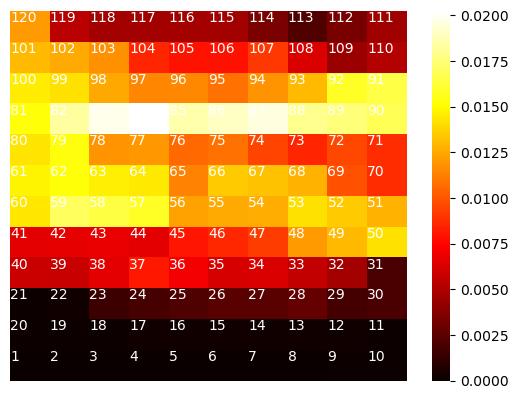

In [38]:
import numpy as np
from numpy.linalg import matrix_power
N = 120 # game size (steps)
p = np.zeros(N) # position probabilities 
p[0] = 1 # initial position
S = np.zeros((N,N)) # step probabilities incidence matrix
g = np.arange(1,N+1) # game path with jumps (below) 
# g[i] is the board destination position from board orign position i-1 
#g[7] = 1
# https://www.osta.ee/lauamang-tsirkus-vaata-pilte-199418720.html
g[2] = 18
g[8] = 10
g[13] = 29
g[14] = 6
g[16] = 35
g[19] = 41
g[25] = 34
g[33] = 96
g[37] = 56
g[49] = 31
g[58] = 78
g[63] = 77
g[67] = 47
g[69] = 71
g[76] = 97
g[91] = 73
g[99] = 81
g[102] = 95
g[106] = 22
g[107] = 113
g[111] = 90
g[115] = 104
g[118] = 100
print(g)
print(g.size)

n = 6; # dice
d = np.ones(n)/n; # step probabilities ahead
# build probability incidence matrix S so that S[i,j] is the probability to go from game path index i to j
#print (p.size,d.size)
for i in range(0,p.size - d.size):
#    print(i, g[i], (g[i] + 1),((g[i] + 1) + d.size))
    S[i,g[i]:(g[i] + d.size)] = d

for i in range(p.size - d.size, p.size-1):
#    print(i, g[i])
    for j in range(0,d.size):
        S[i,min((g[i] + 1) + j, N - (((g[i] + 1) + j) - N) - 2)] += d[j]

S[-1,-1] = 1. # stay at board end position 
print("S=",S[-2:])

#print(S)
p1 = S.T@p;
print(p1, sum(p1))
pn = matrix_power(S.T,15)@p;
#pn = matrix_power(S.T,76)@p;
print(pn, sum(pn))

import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
t = np.arange(1,N+1) # init game path labels 
T = np.flipud(t.reshape(12,10)) # game path bottom to up
T[::2,:] = np.fliplr(T[::2,:]) # game path switching left to right vs right to left

B = np.flipud(pn.reshape(12,10)) # game path bottom to up
B[::2,:] = np.fliplr(B[::2,:]) # game path switching left to right vs right to left

fig, ax = plt.subplots()
#im = ax.imshow(B, cmap='hot', interpolation='nearest', norm='linear', vmin=0, vmax = 1.)
im = ax.imshow(B, cmap='hot', interpolation='nearest')

# Show all ticks and label them with the respective list entries
#ax.set_xticks(range(len(farmers)), labels=farmers,
#              rotation=45, ha="right", rotation_mode="anchor")
#ax.set_yticks(range(len(vegetables)), labels=vegetables)

# Loop over data dimensions and create text annotations.
for i in range(T.shape[0]):
    for j in range(T.shape[1]):
        text = ax.text(j, i, T[i, j],
                       ha="center", va="center", color="w")

ax.set_title("tsirkus")
fig.tight_layout()
plt.show()

# importing the modules 
import seaborn as sn 

# plotting the heatmap 
hm = sn.heatmap(data = B, cmap = 'hot', xticklabels = False, yticklabels = False) 
for i in range(T.shape[0]):
    for j in range(T.shape[1]):
        text = hm.text(j, i, T[i, j],
                       ha="left", va="top", color="w")

# displaying the plotted heatmap 
plt.show()



In [158]:
print(T)

[[120 119 118 117 116 115 114 113 112 111]
 [101 102 103 104 105 106 107 108 109 110]
 [100  99  98  97  96  95  94  93  92  91]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 80  79  78  77  76  75  74  73  72  71]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 60  59  58  57  56  55  54  53  52  51]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 40  39  38  37  36  35  34  33  32  31]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 20  19  18  17  16  15  14  13  12  11]
 [  1   2   3   4   5   6   7   8   9  10]]
